First up, install plotly using the instructions in the [plotly python repo](https://github.com/plotly/plotly.py).

For plotting inside Jupyterlab, the first issue I had is that the conda install of Jupyter Lab had issues with plotly - so I had to [pip install Jupyterlab](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) to get the latest version, then `pip install plotly`. 

This is annoying since Jupyter recommends using conda but they aren't uploading the most recent version there!

So after installing plotly, enable it in jupyter notebook by running at your cli:

```bash
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install plotlywidget
jupyter labextension install @jupyterlab/plotly-extension
```

So now everything should be working. So moving on:

In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objs as go  
from plotly.offline import plot, iplot
from plotly import tools

Some random data:

In [2]:
# random scatter b/w 3-6
x = np.linspace(3,6,num=400)
y = np.random.uniform(low=2, high=8, size=400)
z = np.random.randint(25, size=400)  # to size the markers

# a line plot
y2 = np.linspace(0,10, num=400)

the main thing to understand in plotly is that the `plotly.graph_objs` we have imported as `go` provides a [bunch of graphing objects](https://plot.ly/r/reference/), which we call by doing a `go.Somechartype` like `go.Scatter` and so on.

Plotly has three main ways to draw objects:

1. on screen with jupyterlab by using `go.FigureWidget`. This is the overly verbose name for the widget thingamajig which takes a list of plotly chart objects and draws them right in the notebook. 
2. There is `plot` from plotly.offline which draws the chart and saves it in a html file for consumption offline in a web page or some such thing.
3. And there is a way to do all this in the cloud, which I haven't looked at.

We can chart multiple things on the one figure, by making each **trace**, as plotly refers to them, or a chart type, and pass them all to the figurewidget in a list:

In [4]:
scatter1 = go.Scatter(
        mode = 'markers',
        x = x,
        y = y,
        marker = dict(
          color = 'rgb(17, 157, 255)',
          size = z,
          line = dict(color='rgb(231, 99, 250)', width=2)
        ),
        showlegend = True,
        name = "So Many Points"
)

scatter2 = go.Scatter(
      mode = 'markers',
      x = [2],
      y = [4.5],
      marker = dict(
        color = 'rgb(17, 157, 255)',
        size = 105,
        line = dict(color='rgb(231, 99, 250)', width=22)
      ),
      showlegend = False,
      name="A",
    text = "This is the text which shows on hover<br> and we can have line breaks<br> for paras ",
    hoverinfo= "name+y+text"
    
) 

line = go.Scatter(x=x, y=y2, mode="lines", name="The Line", showlegend=True)

layout = go.Layout(title="This is a title", xaxis=dict(title="X axis title"), yaxis=dict(title="Y"))

fig = go.FigureWidget([scatter1, scatter2, line], layout=layout)
fig

FigureWidget({
    'data': [{'marker': {'color': 'rgb(17, 157, 255)',
                         'line': {'color…

so the above doesn't disply in github, so testing iplot:

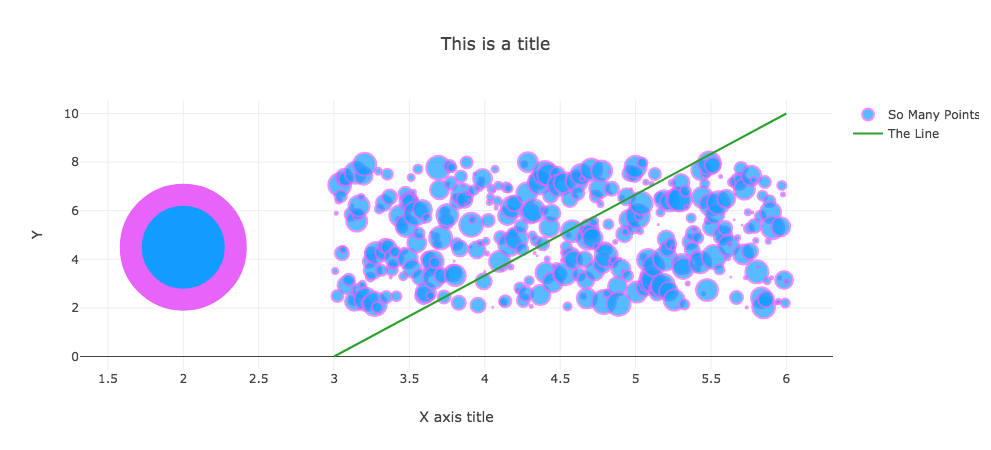

In [6]:
iplot(fig)

And presto we have three different things all on the one chart! Another thing which is cool about plotly is that you can change aspects of the figure in realtime, since its all javascript:

In [4]:
layout2 = go.Layout(title="This is a second title")
fig.layout=layout2

So the above changed the title of the fig object without have to redraw the whole thing afresh.

---

Now I want to show, saw the bubbles above the line in a different colour:

In [10]:
mask = np.ma.make_mask([True if (y>y2) else False for y,y2 in zip(y,y2)])
len(x[mask]), len(x[~mask])

(200, 200)

In [12]:
l1 = go.Scatter(x=x[mask], y=y[mask], mode="markers", 
               marker = dict(color = 'rgb(17, 157, 255)',size=z[mask],
                          line = dict(color='rgb(231, 99, 250)', width=2), opacity=0.6),
                name="Good Points"
               )
l2 = go.Scatter(x=x[~mask], y=y[~mask], mode="markers", 
                marker=dict(color="red",opacity=0.6,size=z[~mask],line=dict(color='blue', width=2)),
               name="Bad Points")

fig2 = go.FigureWidget([l1,l2, line],
                layout= go.Layout(title="The Milkshake seperates the Good Points from the Bad", 
                                  xaxis=dict(title="X axis title"), yaxis=dict(title="Y oh Y"))
               )
fig2

FigureWidget({
    'data': [{'marker': {'color': 'rgb(17, 157, 255)',
                         'line': {'color…

## save the plotly output to a file

This inlcudes the plotly.js script as well:

In [50]:
plot(fig2, filename="test_plotly.html")

'file:///Users/ko/git/nsw_transport/test_plotly.html'

## Save plotly output as a html div

Sometimes embedded a html page is a pain, so plotly can output just the graph code as a `<div>code</div>` html string.

use this when adding plots to a template, and optionally use `include_plotlyjs=False` if doing multiple plotly plots on the same page, just inlude the plotly.js in the html header like so: 

```html
<head>
    <!-- Latest compiled and minified plotly.js JavaScript -->
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
</head>
```

In [48]:
string_to_include_in_html = plot(fig2, output_type="div", include_plotlyjs=True)
print(string_to_include_in_html[:200], "\n---snip---\n", string_to_include_in_html[-300:])

<div><script type="text/javascript">/**
* plotly.js v1.39.4
* Copyright 2012-2018, Plotly, Inc.
* All rights reserved.
* Licensed under the MIT license
*/
!function(t){if("object"==typeof exports&&"un 
---snip---
 7bb-b5df-2bc80d15dc1c',{});}).then(function(){Plotly.animate('9668f793-f959-47bb-b5df-2bc80d15dc1c');})
        </script><script type="text/javascript">window.addEventListener("resize", function(){Plotly.Plots.resize(document.getElementById("9668f793-f959-47bb-b5df-2bc80d15dc1c"));});</script></div>


# comparing with seaborn

matplotlib and seaborn make plotting data in dataframes fast and easy, like the famous iris example:

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


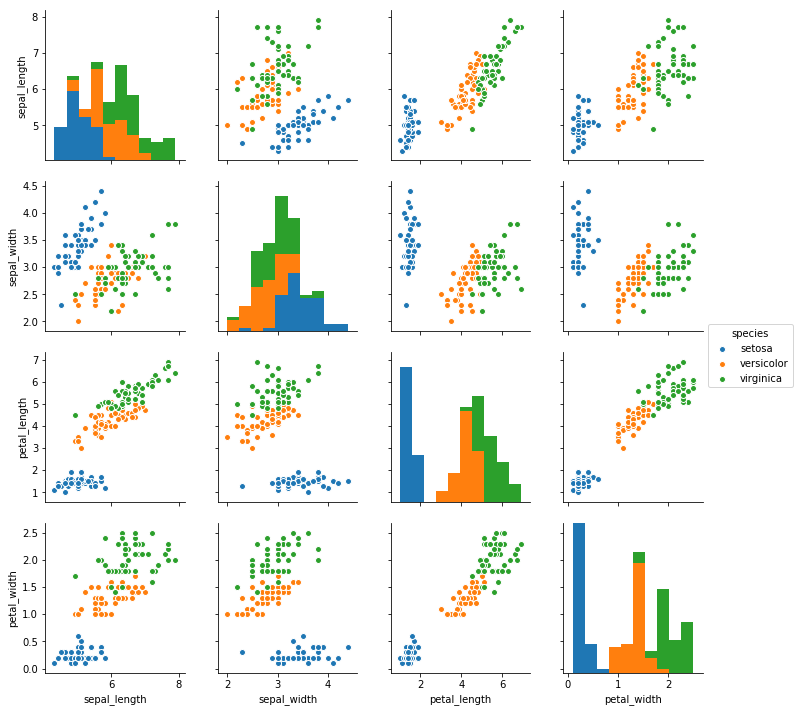

In [53]:
sns.pairplot(df, hue="species");

So I want to see how easy it is to create a scatter plot of say petal_width x petal_length and colour them by species in plotly:

In [55]:
from itertools import cycle, combinations

c = cycle(["red","green","blue"])
colors = {}
for specie in df["species"].unique():
    colors[specie] = next(c)
colors

{'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

In [56]:
fig_iris = tools.make_subplots(rows=1, cols=2, subplot_titles=["sepal vs petal lengths", "sL vs sW"])
fig_iris["layout"].update(title="Hmm this needs lots of work")

for specie in df["species"].unique():
    temp_df = df[df["species"]==specie]
    fig_iris.append_trace(go.Scatter(x=temp_df["sepal_length"], y=temp_df["petal_length"],
                           mode="markers",name=specie, marker=dict(color=colors[specie]),
                                     showlegend=False
                          ),1,1)

for specie in df["species"].unique():
    temp_df = df[df["species"]==specie]
    fig_iris.append_trace(go.Scatter(x=temp_df["sepal_length"], y=temp_df["sepal_width"],
                           mode="markers",name=specie, marker=dict(color=colors[specie]),
                           showlegend=True
                          ),1,2)

    
go.FigureWidget(fig_iris)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



FigureWidget({
    'data': [{'marker': {'color': 'red'},
              'mode': 'markers',
              'name'…

In [57]:
grid = [(x,y) for x,y in zip([1]*3+[2]*3,[1,2,3]*2)]
grid

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]

In [58]:
combs = [(x,y) for x,y in combinations(df.columns.values[:-1],2)]
combs

[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('petal_length', 'petal_width')]

In [59]:
fig2 = tools.make_subplots(rows=2, cols=3,
                              subplot_titles=[f"{x[0]} x {x[1]}" for x in combs])
fig2["layout"].update(title="Hmm this needs lots of work")

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]



In [60]:
show_legend = True

for grid_pos, name in zip(grid, combs):
    
    for specie in df["species"].unique():
        temp_df = df[df["species"]==specie]
        fig2.append_trace(go.Scatter(x=temp_df[name[0]], y=temp_df[name[1]],
                               mode="markers",name=specie, marker=dict(color=colors[specie]),
                               showlegend=show_legend
                              ),grid_pos[0],grid_pos[1])
        
    show_legend = False   # don't show any more legends since all the same

go.FigureWidget(fig2)

FigureWidget({
    'data': [{'marker': {'color': 'red'},
              'mode': 'markers',
              'name'…

That needs a lot of coding to do something which is super easy with seaborn! Still, there is a place for plotly if making a particular kind of graph.

so there is a library called [cufflinks](https://github.com/santosjorge/cufflinks) which promises to integrate pandas with plotly. but it doesn't currently work with plotly 3.x, so leaving this for later.

In [401]:
import cufflinks as cf

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


